# Loan Data from Prosper : Communicate findings
## by Mahmoud Medhat Amir

## Investigation Overview

> # In my investigation, We looked at the main characteristics of loans which could be used in prediction of Loan status if it is completed or not. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income & Employment Status . 

## Dataset Overview

> The dataset contains 83982 loans with 21 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus ,Loan status and many others).
>#### The dictionary for the data of interest.
* loanOrginalAmount=the original amount of loan.
* BorrowerAPR=borrower annual percentage of the loan.
* prosperRating=The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
* Term=How many months can the loan expressed
* Stated monthlyincome=el borrower bya5od kam per month 
* DebtToIncomeRatio=The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
* Loan status=The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* Employment status=The employment status of the borrower at the time they posted the listing.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the previous saved dataset into a pandas dataframe
df_loan = pd.read_csv('df_cleaned.csv')

## Distribution of loans listed year, month .

> January has the highest number of loans .
> There is increasing  in loans listed with each passing year

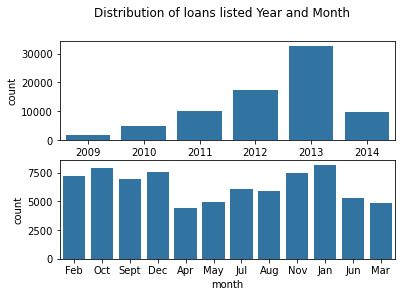

In [16]:
fig, ax = plt.subplots(nrows=2)
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'year', color = base_color, ax = ax[0]);
sb.countplot(data = df_loan, x = 'month', color = base_color, ax = ax[1]);
plt.suptitle("Distribution of loans listed Year and Month", y = 1);

## Distribution of Borrower APR

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

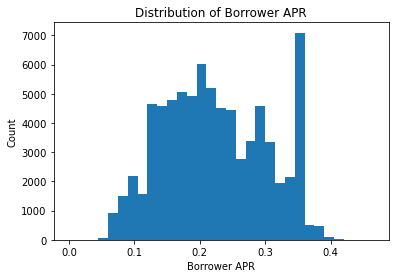

In [17]:
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.015)
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of Borrower APR');

## Distribution of DebtToIncomeRatio 

The distripution shows that most of borrowers go for 1:4 debt to income which makes sense.

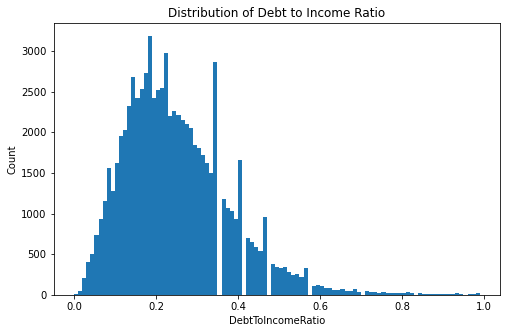

In [18]:
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('Count');
plt.title('Distribution of Debt to Income Ratio');

## The graph for Ratings.

The graph of prosperRating is shown as a normal distribution, C has the largest no of counts.

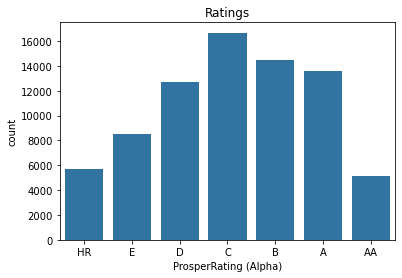

In [19]:
order = ['HR','E','D','C','B','A','AA']
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = base_color,order=order);
plt.title('Ratings');

## Loan status vs. Debt to income ratio

Here is the answer for the question asked ,As we can see that the debt to income ratio for the completed loans is smaller than for the defaulted loans which makes sense , as the borrowers with smaller debt to income ratio are more able to complete their loans.

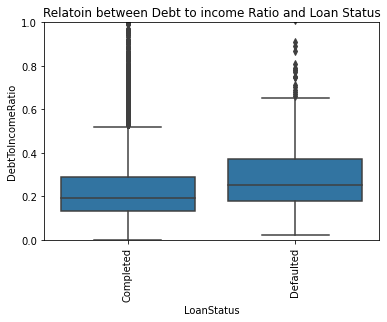

In [20]:
order1=['Completed','Defaulted']
sb.boxplot(data=df_loan, x='LoanStatus', y='DebtToIncomeRatio', color=base_color,order=order1)
plt.ylim(0, 1)
plt.xticks(rotation=90);
plt.title('Relatoin between Debt to income Ratio and Loan Status');

## Loan status vs. borrowers APR
The borrower APR is one the factors affecting the loan status , as you see in the graph the borrower APR for defaulted loans is higher than borrower APR in the completed loans.

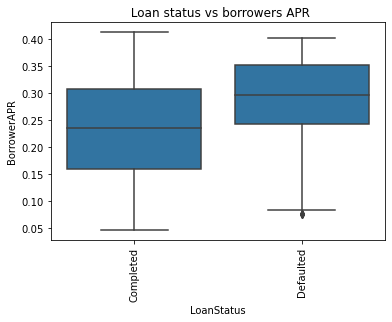

In [21]:
sb.boxplot(data=df_loan, x='LoanStatus', y='BorrowerAPR', color=base_color,order=order1)
plt.xticks(rotation=90);
plt.title(' Loan status vs borrowers APR');

## Borrower APR by Rating and Term

> This distribution is divided into two parts , The borrower APR decreases with the no of terms with rating from HR-C but in the other part from C to AA the borrower APR increases with no of terms.

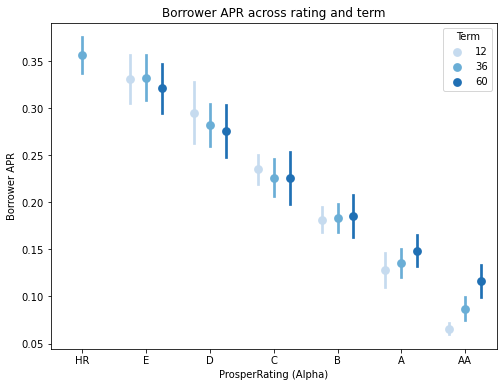

In [22]:
order = ['HR','E','D','C','B','A','AA']

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.5, ci='sd',order=order)
plt.title('Borrower APR across rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

In [23]:
!jupyter nbconvert 'slide_deck_template.ipynb'--to slides --post serve  --no-input --no-prompt


This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern "'slide_deck_template.ipynb'--to" matched no files
[NbConvertApp] WARNING | pattern 'slides' matched no files



--output=<Unicode> (NbConvertApp.output_base)

    Default: ''

    overwrite base name use for output files. can only be used when converting

    one notebook at a time.

--output-dir=<Unicode> (FilesWriter.build_directory)

    Default: ''

    Directory to write output(s) to. Defaults to output to the directory of each

    notebook. To recover previous default behaviour (outputting to the current

    working directory) use . as the flag value.

--reveal-prefix=<Unicode> (SlidesExporter.reveal_url_prefix)

    Default: ''

    The URL prefix for reveal.js (version 3.x). This defaults to the reveal CDN,

    but can be any url pointing to a copy  of reveal.js.

    For speaker notes to work, this must be a relative path to a local  copy of

    reveal.js: e.g., "reveal.js".

    If a relative path is given, it must be a subdirectory of the current

    directory (from which the server is run).

    See the usage documentation

    (https://nbconvert.readthedocs.io/en/latest/usage.